In [70]:
###Correlation between stations.

from viresclient import SwarmRequest
import hapiclient
from hapiclient.util import pythonshell
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from chaosmagpy import load_CHAOS_matfile
from chaosmagpy.model_utils import synth_values
from chaosmagpy.data_utils import mjd2000 # Modified Julian date
import tqdm
from sklearn.cluster import KMeans

import utils

In [71]:
import os

###Import list of observatories from csv.
df = pd.read_csv("data/ObsListimo.csv")
print(df['Code'])

listofstationobs=[]

0      ABG
1      ABK
2      AIA
3      API
4      ARS
      ... 
117    VSS
118    WIC
119    WNG
120    YAK
121    YKC
Name: Code, Length: 122, dtype: object


In [72]:
listofstationobs=[]
for i in tqdm.tqdm(df['Code']):
    if os.path.isfile("data/"+i+".csv"):
        dfi=pd.read_csv("data/"+i+".csv")
        dfi=dfi['0']
        dfi=dfi.to_numpy()
        print(dfi)
        listofstationobs.append(dfi)
    else:
        continue

100%|███████████████████████████████████████████████████████████████████████████████| 122/122 [00:00<00:00, 1036.09it/s]

['ABG' '0.08794706429562191' '18.503862645140103' '72.87']
['ABK' '1.4278030878349572' '68.2237443153074' '18.824']
['BDV' '0.2033230139880541' '48.88944614771234' '14.015']
['BEL' '0.2962025349259088' '51.64988467313125' '20.792']
['BLC' '1.701273710385412' '64.1492998350029' '264.0']
['BMT' '0.15896809110802815' '40.1102673265455' '116.2']
['BOU' '0.2705578613332009' '39.9105401962472' '254.8']
['BRW' '3.346555105882482' '71.18281235227613' '203.399']
['BSL' '0.19080948368197387' '30.233298593278576' '270.399']
['CLF' '0.2824607603093794' '47.82557682325504' '2.266']
['CMO' '1.2894413805423437' '64.75184809422272' '212.199']
['CNB' '0.18016138998842207' '-35.13369230500176' '149.363']
['ESK' '0.2776877479615107' '55.11967152957852' '356.8']
['EYR' '0.20255853423097073' '-43.2319036075352' '172.354']
['FCC' '1.5948864094980622' '58.629205863360895' '265.9']
['FRD' '0.19913715839903448' '38.0141173568323' '282.6']
['FRN' '0.19284532687790706' '36.91502291392519' '240.3']
['FUR' '0.1978

In [73]:
listofstationobs=np.array(listofstationobs)
listofstationobs[:,1:]=listofstationobs[:,1:].astype(float)
print(listofstationobs)

[['ABG' 0.08794706429562191 18.503862645140103 72.87]
 ['ABK' 1.4278030878349572 68.2237443153074 18.824]
 ['BDV' 0.2033230139880541 48.88944614771234 14.015]
 ['BEL' 0.2962025349259088 51.64988467313125 20.792]
 ['BLC' 1.701273710385412 64.1492998350029 264.0]
 ['BMT' 0.15896809110802815 40.1102673265455 116.2]
 ['BOU' 0.2705578613332009 39.9105401962472 254.8]
 ['BRW' 3.346555105882482 71.18281235227613 203.399]
 ['BSL' 0.19080948368197387 30.233298593278576 270.399]
 ['CLF' 0.2824607603093794 47.82557682325504 2.266]
 ['CMO' 1.2894413805423437 64.75184809422272 212.199]
 ['CNB' 0.18016138998842207 -35.13369230500176 149.363]
 ['ESK' 0.2776877479615107 55.11967152957852 356.8]
 ['EYR' 0.20255853423097073 -43.2319036075352 172.354]
 ['FCC' 1.5948864094980622 58.629205863360895 265.9]
 ['FRD' 0.19913715839903448 38.0141173568323 282.6]
 ['FRN' 0.19284532687790706 36.91502291392519 240.3]
 ['FUR' 0.19785727904720812 47.9736934397732 11.277]
 ['GDH' 1.5690501849461385 69.12217332730137 3

Text(0, 0.5, 'Absolute difference in dBdt calculation for period 1998-2020')

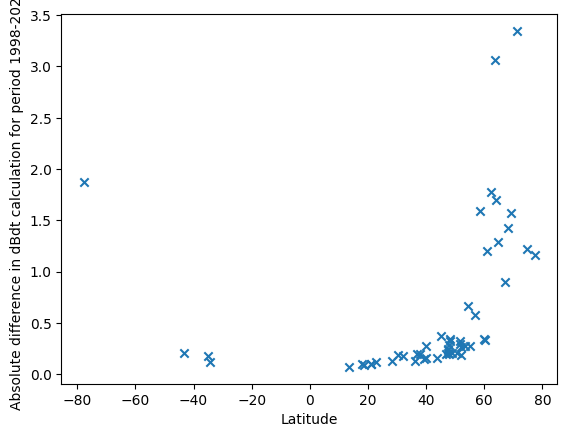

In [81]:
plt.scatter(listofstationobs[:,2],listofstationobs[:,1],marker='x')
plt.xlabel('Latitude')
plt.ylabel('Absolute difference in dBdt calculation for period 1998-2020')

Text(0, 0.5, 'Absolute difference in dBdt calculation for period 1998-2020')

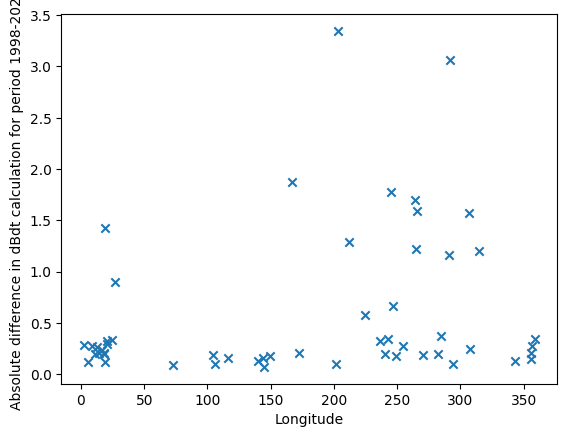

In [82]:
plt.scatter(listofstationobs[:,3],listofstationobs[:,1],marker='x')
plt.xlabel('Longitude')
plt.ylabel('Absolute difference in dBdt calculation for period 1998-2020')